                     
                                        
                                              
                                              آشنایی با هوش مصنوعی
                   810197581 ملیکا مرافق
                  
                   

هدف از انجام این پروژه پر کردن نواقص یک دیتاست به کمک تحلیل آماری است       




فایلی شامل اطلاعات 1000 کاربر یک سایت داریم که با آگهی اینترنتی برخورد کرده اند.هر سطر شامل ویژگی هایی از قبیل سن،جنسیت،محل زندگی و ... کاربراست که ورودی مدل محسوب می شوند. می خواهیم بررسی کنیم که آیا کاربر بروی آگهی کلیک کرده است یا خیر.

برای تعدادی از نمونه ها ستون هدف(کلیک کردن بر آگهی) موجود نیست.می خواهیم این مقادیر را با استفاده ار مدل آماری ساده پیش بینی کنیم.
برای ساخت مدل از سایر نمونه ها کمک می گیریم. 


In [1]:
from  scipy.stats import norm
import matplotlib.pyplot as plt
import numpy 
import pandas
import time

adData = pandas.read_csv ('D:/هوش/CA/0/advertising_dataset.csv')


# 1




In [2]:
adData.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


In [3]:
adData.tail()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


head():به صورت پیش فرض 5 سطر ابتدایی را باز می گرداند


tail():به صورت پیش فرض 5 سطر آخر را باز می گرداند

In [4]:
adData.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,1.000000
max,999.000000,91.430000,61.000000,79484.800000,269.960000,1.000000


تعداد داده های غیر خالی را نشان می دهد count

برای داده های عددی:  میانگین، انحراف معیار، کمترین و بیشترین مقدار عددی داده ها را نشان می دهد 

برای داده های دسته ای

top:  داده ای است که بیشترین فراوانی را دارد

freq: فراوانی top

unique:بیانگر تعداد داده های متمایز است

In [5]:
adData.describe(include ='all')

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
count,1000.000000,907.000000,979.000000,1000.000000,913.000000,1000,1000,1000,1000,1000,832.000000
unique,NaN,NaN,NaN,NaN,NaN,1000,969,2,237,1000,NaN
top,NaN,NaN,NaN,NaN,NaN,Fully-configurable clear-thinking throughput,Williamsport,Female,Czech Republic,2016-07-21 16:02:40,NaN
freq,NaN,NaN,NaN,NaN,NaN,1,3,519,9,1,NaN
mean,499.500000,64.794818,36.009193,55000.000080,179.751271,NaN,NaN,NaN,NaN,NaN,0.496394
std,288.819436,15.954841,8.783636,13414.634022,43.957934,NaN,NaN,NaN,NaN,NaN,0.500288
min,0.000000,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,249.750000,50.615000,29.000000,47031.802500,138.550000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,499.500000,67.940000,35.000000,57012.300000,183.480000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,749.250000,78.555000,42.000000,65470.635000,217.850000,NaN,NaN,NaN,NaN,NaN,1.000000


# 2

In [6]:
adData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0                  1000 non-null int64
Daily Time Spent on Site    907 non-null float64
Age                         979 non-null float64
Area Income                 1000 non-null float64
Daily Internet Usage        913 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Gender                      1000 non-null object
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               832 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.0+ KB


In [7]:
adData['Gender'] = adData['Gender'].map( {'Male':1, 'Female':0} )
adData.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


# 3

In [8]:

adData.isna().sum()


Unnamed: 0                    0
Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64


می توان داده ای که بیشترین فراوانی را دارد جایگزین کرد. محدودیتی در نوع داده نداریم و میتوان این روش را بر داده های دسته ای نیز اعمال کرد(بر خلاف میانگین که فقط در داده های عددی قابل استفاده است.در هر دو روش ارتباط و همبستگی بین ویژگی ها در نظر گرفته نمی شود. 




In [9]:
clickedonAd_loc = adData.columns.get_loc('Clicked on Ad')
df = adData.iloc[:,:clickedonAd_loc]
df.fillna(adData.mean(),inplace = True)
adData.iloc[:,:clickedonAd_loc] = df
adData



,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.950000,35.000000,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,1,80.230000,31.000000,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,2,69.470000,26.000000,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,3,74.150000,29.000000,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,4,68.370000,35.000000,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0
5,5,59.990000,23.000000,59761.56,226.740000,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0.0
6,6,88.910000,33.000000,53852.85,208.360000,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0.0
7,7,66.000000,48.000000,24593.33,131.760000,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1.0
8,8,74.530000,30.000000,68862.00,221.510000,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0.0
9,9,69.880000,20.000000,55642.32,183.820000,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0.0


# 4

In [10]:
count = adData['Gender'].value_counts() 
print(count) 

0    519
1    481
Name: Gender, dtype: int64


In [11]:

count = adData.groupby(['Gender', 'Clicked on Ad']).size() 
count

Gender  Clicked on Ad
0       0.0              207
        1.0              216
1       0.0              212
        1.0              197
dtype: int64

# 5

In [12]:
adData[(adData['Age'] > 20 ) & (adData['Gender'] == 0 )].shape[0]


516

# 6

In [13]:
Vstart = time.time()

means =  adData.groupby('Clicked on Ad')['Age'].mean()

Vend = time.time()

means

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64

# 7

In [14]:

sum0 = 0 ; sum1 = 0 
click0_cnt = 0 ; click1_cnt = 0 

age_loc  = adData.columns.get_loc('Age')
clickedonAd_loc = adData.columns.get_loc('Clicked on Ad')


start = time.time()


for row in range(adData.shape[0]) :

    if adData.iloc[row , clickedonAd_loc] == 0 :
        sum0 += adData.iloc[row , age_loc]
        click0_cnt +=1
    elif adData.iloc[row , clickedonAd_loc] == 1 :
        sum1 += adData.iloc[row , age_loc]
        click1_cnt += 1

mean_age0 = sum1/click1_cnt
mean_age1 = sum0/click0_cnt

print(mean_age0,mean_age1)

end = time.time()



40.295599848637366 31.723325881701896


In [15]:

print('vectorization :',(Vend - Vstart)* 1000,'ms')

print('for loop :',(end - start)* 1000,'ms')

vectorization : 1.9953250885009766 ms
for loop : 35.94064712524414 ms


vectorization حدود 30-20 برابر سریع تر از استفاده از حلقه است .

# 8

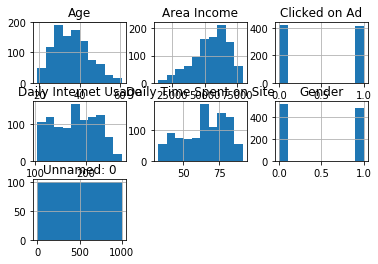

In [16]:
hist = adData.hist()


# 9

In [17]:
adData = adData.select_dtypes(exclude = ['object'])
adData = adData.drop('Gender',axis = 1)


In [18]:
clickedonAd_loc = adData.columns.get_loc('Clicked on Ad')
data_cpy = adData.iloc[:,:clickedonAd_loc]
adData.iloc[:,:clickedonAd_loc] = (data_cpy - data_cpy.mean())/data_cpy.std()
adData



,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,-1.729454,2.734741e-01,-1.161217e-01,0.509436,1.817578e+00,0.0
1,-1.725992,1.015870e+00,-5.763771e-01,1.002029,-1.353406e-15,0.0
2,-1.722530,3.076980e-01,-1.151696e+00,0.356770,1.351152e+00,0.0
3,-1.719067,6.157131e-01,-8.065049e-01,-0.014448,1.574722e+00,0.0
4,-1.715605,2.353013e-01,-1.161217e-01,1.408163,1.091154e+00,0.0
5,-1.712142,-3.162300e-01,-1.496888e+00,0.354953,1.118772e+00,0.0
6,-1.708680,1.587145e+00,-3.462494e-01,-0.085515,6.811561e-01,0.0
7,-1.705218,7.931928e-02,1.379709e+00,-2.266679,-1.142642e+00,1.0
8,-1.701755,6.407229e-01,-6.914410e-01,1.033349,9.942494e-01,0.0
9,-1.698293,3.346822e-01,-1.842080e+00,0.047882,9.687392e-02,0.0


# 10

In [19]:
means =  adData.groupby('Clicked on Ad').mean()
means

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0.0,-0.034719,0.714104,-0.493148,0.476367,0.764216
1.0,0.017366,-0.691783,0.493211,-0.498632,-0.753395


In [20]:
std = adData.groupby('Clicked on Ad').std()
std

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0.0,0.974497,0.531369,0.706315,0.670476,0.592058
1.0,1.035049,0.836161,1.019268,1.046199,0.723959


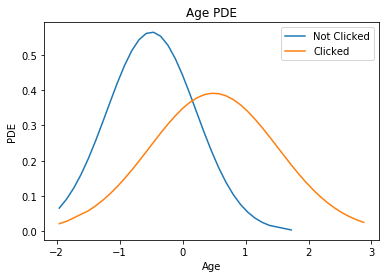

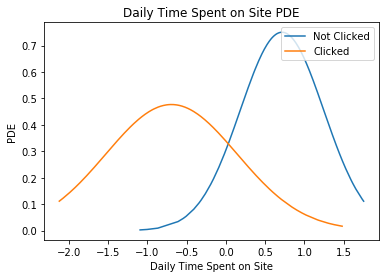

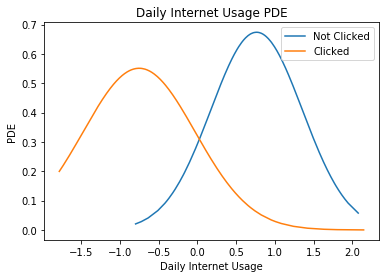

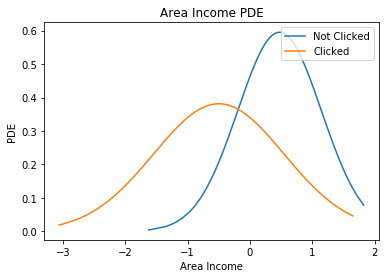

In [21]:
x0 = adData['Age'][adData['Clicked on Ad'] == 0]
x1 = adData['Age'][adData['Clicked on Ad'] == 1]

x0.sort_values(inplace = True)
x1.sort_values(inplace = True)

plt.plot(x0, norm.pdf(x0, means['Age'][0], std['Age'][0]),label = 'Not Clicked')
plt.plot(x1, norm.pdf(x1, means['Age'][1], std['Age'][1]),label = 'Clicked')
plt.legend(loc = "upper right")
plt.title('Age PDE')
plt.xlabel('Age')
plt.ylabel('PDE')
plt.show()


###############################

x0 = adData['Daily Time Spent on Site'][adData['Clicked on Ad'] == 0]
x1 = adData['Daily Time Spent on Site'][adData['Clicked on Ad'] == 1]

x0.sort_values(inplace = True)
x1.sort_values(inplace = True)

plt.plot(x0, norm.pdf(x0, means['Daily Time Spent on Site'][0], std['Daily Time Spent on Site'][0]),label = 'Not Clicked')
plt.plot(x1, norm.pdf(x1, means['Daily Time Spent on Site'][1], std['Daily Time Spent on Site'][1]),label = 'Clicked')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('PDE')
plt.title('Daily Time Spent on Site PDE')
plt.legend(loc = "upper right")
plt.show()

###########################

x0 = adData['Daily Internet Usage'][adData['Clicked on Ad'] == 0]
x1 = adData['Daily Internet Usage'][adData['Clicked on Ad'] == 1]
x0.sort_values(inplace = True)
x1.sort_values(inplace = True)

plt.plot(x0, norm.pdf(x0, means['Daily Internet Usage'][0], std['Daily Internet Usage'][0]),label = 'Not Clicked')
plt.plot(x1, norm.pdf(x1, means['Daily Internet Usage'][1], std['Daily Internet Usage'][1]),label = 'Clicked')
plt.xlabel('Daily Internet Usage')
plt.ylabel('PDE')
plt.legend(loc = "upper right")
plt.title('Daily Internet Usage PDE')
plt.show()

#############################

x0 = adData['Area Income'][adData['Clicked on Ad'] == 0]
x1 = adData['Area Income'][adData['Clicked on Ad'] == 1]
x0.sort_values(inplace = True)
x1.sort_values(inplace = True)


plt.plot(x0, norm.pdf(x0, means['Area Income'][0], std['Area Income'][0]),label = 'Not Clicked')
plt.plot(x1, norm.pdf(x1, means['Area Income'][1], std['Area Income'][1]),label = 'Clicked')
plt.legend(loc = "upper right")
plt.xlabel('Area Income')
plt.ylabel('PDE')
plt.title('Area Income PDE')
plt.show()

**Daily Internet Usage

 نقاط ماکسیمم(میانگین) در این ویژگی نسبت به سایر در فاصله بیشتری نسبت به هم قرار دارند .
 .و دو نمودار سطح اشتراک کمتری دارند


در بازه
(mean - std,mean + std)

اشتراکی ندارند در صورتی که در باقی ویژگی ها این چنین نیست و نمی توان بر این اساس تصمیم گرفت 

# 11

In [22]:
not_clicked_min1 = means['Daily Internet Usage'][0] - std['Daily Internet Usage'][0] 
not_clicked_max1 = means['Daily Internet Usage'][0] + std['Daily Internet Usage'][0]

not_clicked_min2 = means['Daily Internet Usage'][0] - 2*std['Daily Internet Usage'][0]
not_clicked_max2 = means['Daily Internet Usage'][0] + 2*std['Daily Internet Usage'][0]

clicked_min1 = means['Daily Internet Usage'][1] - std['Daily Internet Usage'][1]
clicked_max1 = means['Daily Internet Usage'][1] + std['Daily Internet Usage'][1]

clicked_min2 = means['Daily Internet Usage'][1] - 2*std['Daily Internet Usage'][1]
clicked_max2 = means['Daily Internet Usage'][1] + 2*std['Daily Internet Usage'][1]

index = []
target = []


for row in range(adData.shape[0]) :
    if adData['Clicked on Ad'].isna()[row]:
        index.append(row)
        
        if not_clicked_min1 <= adData['Daily Internet Usage'][row] <= not_clicked_max1:
            target.append(0)
            
        elif clicked_min1 <= adData['Daily Internet Usage'][row] <= clicked_max1:
             target.append(1)

        elif not_clicked_min2 <= adData['Daily Internet Usage'][row] <= not_clicked_max2:
             target.append(0)       
        
        elif clicked_min2 <= adData['Daily Internet Usage'][row] <= clicked_max2:
             target.append(1)
            
             

df = pandas.DataFrame(list(zip(index, target)), columns =['Index', 'Clicked on Ad']) 
df.to_csv('df.csv', index = False) 
